# EDA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd

# Path ke file txt kamu
txt_path = '/content/drive/My Drive/Colab Notebooks/Tugas3NLP/train.txt'
csv_output_path = '/content/drive/My Drive/Colab Notebooks/Tugas3NLP/train.csv'

# Baca file txt
data = []
with open(txt_path, 'r', encoding='utf-8') as f:
    for line in f:
        if ';' in line:
            text, label = line.strip().split(';')
            data.append({'text': text, 'label': label})

# Ubah ke DataFrame
df = pd.DataFrame(data)

# Simpan ke CSV
df.to_csv(csv_output_path, index=False)

# Cek isi
print(df.head())


                                                text    label
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger


In [8]:
import pandas as pd

# Path ke file txt kamu
txt_path = '/content/drive/My Drive/Colab Notebooks/Tugas3NLP/test.txt'
csv_output_path = '/content/drive/My Drive/Colab Notebooks/Tugas3NLP/test.csv'

# Baca file txt
data = []
with open(txt_path, 'r', encoding='utf-8') as f:
    for line in f:
        if ';' in line:
            text, label = line.strip().split(';')
            data.append({'text': text, 'label': label})

# Ubah ke DataFrame
df = pd.DataFrame(data)

# Simpan ke CSV
df.to_csv(csv_output_path, index=False)

# Cek isi
print(df.head())


                                                text    label
0  im feeling rather rotten so im not very ambiti...  sadness
1          im updating my blog because i feel shitty  sadness
2  i never make her separate from me because i do...  sadness
3  i left with my bouquet of red and yellow tulip...      joy
4    i was feeling a little vain when i did this one  sadness


In [9]:
import pandas as pd

# Path ke file txt kamu
txt_path = '/content/drive/My Drive/Colab Notebooks/Tugas3NLP/val.txt'
csv_output_path = '/content/drive/My Drive/Colab Notebooks/Tugas3NLP/val.csv'

# Baca file txt
data = []
with open(txt_path, 'r', encoding='utf-8') as f:
    for line in f:
        if ';' in line:
            text, label = line.strip().split(';')
            data.append({'text': text, 'label': label})

# Ubah ke DataFrame
df = pd.DataFrame(data)

# Simpan ke CSV
df.to_csv(csv_output_path, index=False)

# Cek isi
print(df.head())


                                                text    label
0  im feeling quite sad and sorry for myself but ...  sadness
1  i feel like i am still looking at a blank canv...  sadness
2                     i feel like a faithful servant     love
3                  i am just feeling cranky and blue    anger
4  i can have for a treat or if i am feeling festive      joy


In [18]:
import pandas as pd

train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tugas3NLP/train.csv', sep=',', encoding='utf-8')
val_df   = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tugas3NLP/val.csv', sep=',', encoding='utf-8')
test_df  = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tugas3NLP/test.csv', sep=',', encoding='utf-8')

# Periksa kolom dan isi
print("Kolom train_df:", train_df.columns)
print(train_df.head())
print("Kolom val_df:", val_df.columns)
print(val_df.head())
print("Kolom test_df:", test_df.columns)
print(test_df.head())

Kolom train_df: Index(['text', 'label'], dtype='object')
                                                text    label
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger
Kolom val_df: Index(['text', 'label'], dtype='object')
                                                text    label
0  im feeling quite sad and sorry for myself but ...  sadness
1  i feel like i am still looking at a blank canv...  sadness
2                     i feel like a faithful servant     love
3                  i am just feeling cranky and blue    anger
4  i can have for a treat or if i am feeling festive      joy
Kolom test_df: Index(['text', 'label'], dtype='object')
                                                text    label
0  im feeling rather rotte

# Prepo dataset

In [20]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Download resource NLTK yang diperlukan
nltk.download('punkt_tab')  # Diperbarui dari 'punkt' ke 'punkt_tab'
nltk.download('stopwords')
nltk.download('wordnet')

# Baca data (dengan perbaikan sep=',')
train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tugas3NLP/train.csv', sep=',', encoding='utf-8')
val_df   = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tugas3NLP/val.csv', sep=',', encoding='utf-8')
test_df  = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tugas3NLP/test.csv', sep=',', encoding='utf-8')

# Fungsi pembersihan teks
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)  # Ini membutuhkan punkt_tab
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Terapkan pembersihan teks
train_df['cleaned_text'] = train_df['text'].apply(clean_text)
val_df['cleaned_text'] = val_df['text'].apply(clean_text)
test_df['cleaned_text'] = test_df['text'].apply(clean_text)

# Cek hasil
print("Contoh train_df setelah pembersihan:")
print(train_df[['text', 'cleaned_text']].head())
print("Contoh val_df setelah pembersihan:")
print(val_df[['text', 'cleaned_text']].head())
print("Contoh test_df setelah pembersihan:")
print(test_df[['text', 'cleaned_text']].head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Contoh train_df setelah pembersihan:
                                                text  \
0                            i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned...   
2   im grabbing a minute to post i feel greedy wrong   
3  i am ever feeling nostalgic about the fireplac...   
4                               i am feeling grouchy   

                                        cleaned_text  
0                              didnt feel humiliated  
1  go feeling hopeless damned hopeful around some...  
2          im grabbing minute post feel greedy wrong  
3  ever feeling nostalgic fireplace know still pr...  
4                                    feeling grouchy  
Contoh val_df setelah pembersihan:
                                                text  \
0  im feeling quite sad and sorry for myself but ...   
1  i feel like i am still looking at a blank canv...   
2                     i feel like a faithful servant   
3                  i am just feeling 

In [21]:
# Tokenisasi dan vektorisasi
max_words = 5000  # Jumlah kata maksimum dalam vocabulary
max_len = 30      # Panjang maksimum urutan teks (berdasarkan analisis)

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(train_df['cleaned_text'])

# Ubah teks menjadi urutan angka
train_sequences = tokenizer.texts_to_sequences(train_df['cleaned_text'])
val_sequences = tokenizer.texts_to_sequences(val_df['cleaned_text'])
test_sequences = tokenizer.texts_to_sequences(test_df['cleaned_text'])

# Padding urutan
train_padded = pad_sequences(train_sequences, maxlen=max_len, padding='post', truncating='post')
val_padded = pad_sequences(val_sequences, maxlen=max_len, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_len, padding='post', truncating='post')

# Cek bentuk data setelah padding
print("Shape of train_padded:", train_padded.shape)
print("Shape of val_padded:", val_padded.shape)
print("Shape of test_padded:", test_padded.shape)

# Encode label
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_df['label'])
val_labels = label_encoder.transform(val_df['label'])
test_labels = label_encoder.transform(test_df['label'])

# Cek label yang diencode
print("Encoded labels:", label_encoder.classes_)

Shape of train_padded: (16000, 30)
Shape of val_padded: (2000, 30)
Shape of test_padded: (2000, 30)
Encoded labels: ['anger' 'fear' 'joy' 'love' 'sadness' 'surprise']


# Model Build BI-LSTM

## 1. Bangun Framework Bi-LSTM

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, Masking

# Parameter model
embedding_dim = 100  # Dimensi embedding
num_classes = len(label_encoder.classes_)

# Bangun model Bi-LSTM
model = Sequential([
    # Layer Embedding untuk mengubah token menjadi vektor
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),

    # Masking untuk mengabaikan nilai padding (0)
    Masking(mask_value=0.0),

    # Layer Bi-LSTM
    Bidirectional(LSTM(64, return_sequences=False)),

    # Layer Dense untuk klasifikasi
    Dense(64, activation='relu'),
    Dropout(0.7),  # Dropout untuk mencegah overfitting

    # Layer output dengan softmax untuk klasifikasi multi-kelas
    Dense(num_classes, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Untuk label integer
              metrics=['accuracy'])

# Ringkasan model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ masking_1 (Masking)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 2. Latih Model

In [29]:
# Parameter pelatihan
epochs = 10
batch_size = 32

# Latih model
history = model.fit(
    train_padded, train_labels,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(val_padded, val_labels),
    verbose=1
)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 40s 66ms/step - accuracy: 0.3834 - loss: 1.5098 - val_accuracy: 0.8250 - val_loss: 0.5211
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.8560 - loss: 0.4437 - val_accuracy: 0.8750 - val_loss: 0.3327
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 38s 53ms/step - accuracy: 0.9157 - loss: 0.2409 - val_accuracy: 0.8785 - val_loss: 0.3590
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.9312 - loss: 0.1878 - val_accuracy: 0.8865 - val_loss: 0.3440
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.9473 - loss: 0.1461 - val_accuracy: 0.8930 - val_loss: 0.3739
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.9588 - loss: 0.1194 - val_accuracy: 0.9050 - val_loss: 0.4311
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.9596 - loss: 0.1100 - val_accuracy: 0.9075 - val_loss: 0.4423
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.9717 - loss: 0.0866 - 

## 3. Evaluasi Model

In [30]:
# Evaluasi model pada data pengujian
test_loss, test_accuracy = model.evaluate(test_padded, test_labels, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Prediksi pada data pengujian
predictions = model.predict(test_padded)
predicted_labels = predictions.argmax(axis=1)  # Ambil label dengan probabilitas tertinggi

# Tampilkan beberapa prediksi
print("\nBeberapa Contoh Prediksi:")
for i in range(5):
    print(f"Teks: {test_df['text'].iloc[i]}")
    print(f"Label Sebenarnya: {label_encoder.classes_[test_labels[i]]}")
    print(f"Label Prediksi: {label_encoder.classes_[predicted_labels[i]]}\n")

Test Loss: 0.4038
Test Accuracy: 0.9075
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step

Beberapa Contoh Prediksi:
Teks: im feeling rather rotten so im not very ambitious right now
Label Sebenarnya: sadness
Label Prediksi: sadness

Teks: im updating my blog because i feel shitty
Label Sebenarnya: sadness
Label Prediksi: sadness

Teks: i never make her separate from me because i don t ever want her to feel like i m ashamed with her
Label Sebenarnya: sadness
Label Prediksi: sadness

Teks: i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived
Label Sebenarnya: joy
Label Prediksi: joy

Teks: i was feeling a little vain when i did this one
Label Sebenarnya: sadness
Label Prediksi: sadness



## 4. Visualisasi Hasil Pelatihan

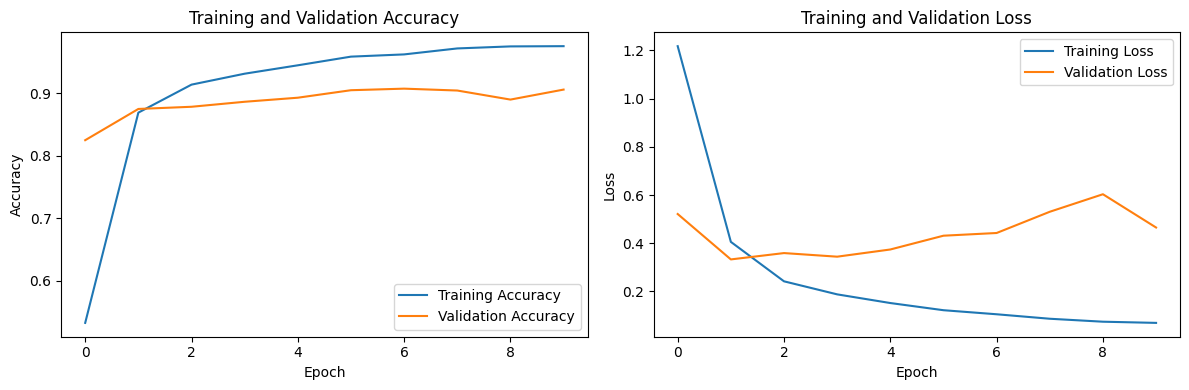

In [31]:
import matplotlib.pyplot as plt

# Plot akurasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## 5. Analisis Performa Lebih Lanjut

Classification Report:
              precision    recall  f1-score   support

       anger       0.90      0.93      0.92       275
        fear       0.89      0.88      0.89       224
         joy       0.92      0.93      0.93       695
        love       0.77      0.80      0.78       159
     sadness       0.96      0.93      0.94       581
    surprise       0.73      0.71      0.72        66

    accuracy                           0.91      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.91      0.91      0.91      2000



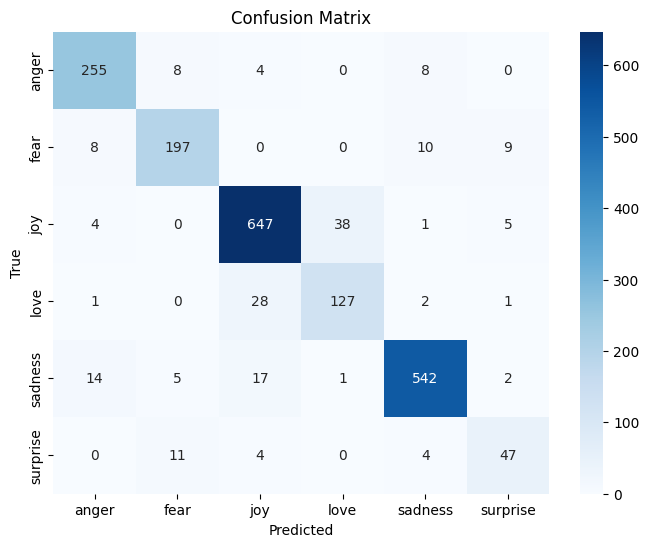

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Classification report
print("Classification Report:")
print(classification_report(test_labels, predicted_labels, target_names=label_encoder.classes_))

# Confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## 6. Tuning Hyperparameter (Opsional)

In [33]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## 7. Simpan Model (Opsional)

In [34]:
# Simpan model
model.save('/content/drive/My Drive/Colab Notebooks/Tugas3NLP/emotion_classifier.h5')
print("Model disimpan di:", '/content/drive/My Drive/Colab Notebooks/Tugas3NLP/emotion_classifier.h5')

# Untuk memuat model kembali (di masa depan):
# from tensorflow.keras.models import load_model
# model = load_model('/content/drive/My Drive/Colab Notebooks/Tugas3NLP/emotion_classifier.h5')

Model disimpan di: /content/drive/My Drive/Colab Notebooks/Tugas3NLP/emotion_classifier.h5


## 8. Prediksi pada Data Baru (Opsional)

In [35]:
# Fungsi untuk memproses teks baru
def preprocess_new_text(text):
    cleaned_text = clean_text(text)  # Gunakan fungsi clean_text dari preprocessing
    sequence = tokenizer.texts_to_sequences([cleaned_text])
    padded = pad_sequences(sequence, maxlen=max_len, padding='post', truncating='post')
    return padded

# Contoh teks baru
new_text = "I feel so happy today because I got a new job!"
padded_text = preprocess_new_text(new_text)

# Prediksi
prediction = model.predict(padded_text)
predicted_label = prediction.argmax(axis=1)[0]
print(f"Teks: {new_text}")
print(f"Prediksi Emosi: {label_encoder.classes_[predicted_label]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
Teks: I feel so happy today because I got a new job!
Prediksi Emosi: joy
